# Mask R-CNN Semantic Segmentation

Import library and set parameters

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

sys.path.append(os.path.join(ROOT_DIR, "samples/fmask/"))
import fmask
import imgaug
import imgaug.augmenters as iaa

import tensorflow as tf 
#print(tf.__version__)
import keras as ks
#print(ks.__version__)

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
FMASK_DIR = os.path.join(ROOT_DIR, "datasets/fmask/")
IMAGE_DIR = os.path.join(ROOT_DIR, "datasets/fmask/test")
train_dataset="../../datasets/fmask"

# Local path to trained weights file
FMASK_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_fmask.h5")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)



D:\Anaconda3\envs\mask2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\mask2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\mask2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\mask2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (

## Training

In [2]:
config = fmask.FMaskConfig()
config.BACKBONE = "resnet50"

config.display()
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)
weights_path = COCO_WEIGHTS_PATH
model.load_weights(weights_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

#faug = iaa.Sequential([iaa.Fliplr(1),iaa.CLAHE()])
#faug = iaa.OneOf([iaa.ContrastNormalization((0.5, 1.5)), iaa.GaussianBlur(sigma=(0.0, 5.0))])
faug = None
fmask.fit(30,model, train_dataset, config, "mask_rcnn_fmask.h5", FMASK_MODEL_PATH, faug)


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

50/50 [==============================] - 25s 491ms/step - loss: 1.7237 - rpn_class_loss: 0.0942 - rpn_bbox_loss: 0.5644 - mrcnn_class_loss: 0.1706 - mrcnn_bbox_loss: 0.4239 - mrcnn_mask_loss: 0.4706 - val_loss: 1.5878 - val_rpn_class_loss: 0.0887 - val_rpn_bbox_loss: 0.4828 - val_mrcnn_class_loss: 0.1645 - val_mrcnn_bbox_loss: 0.4050 - val_mrcnn_mask_loss: 0.4468
Epoch 6/30
50/50 [==============================] - 22s 439ms/step - loss: 1.5036 - rpn_class_loss: 0.0782 - rpn_bbox_loss: 0.4884 - mrcnn_class_loss: 0.1021 - mrcnn_bbox_loss: 0.4152 - mrcnn_mask_loss: 0.4197 - val_loss: 1.4437 - val_rpn_class_loss: 0.0842 - val_rpn_bbox_loss: 0.3368 - val_mrcnn_class_loss: 0.2370 - val_mrcnn_bbox_loss: 0.4592 - val_mrcnn_mask_loss: 0.3265
Epoch 7/30
50/50 [==============================] - 21s 426ms/step - loss: 1.5050 - rpn_class_loss: 0.0843 - rpn_bbox_loss: 0.5224 - mrcnn_class_loss: 0.1645 - mrcnn_bbox_loss: 0.3816 - mrcnn_mask_loss: 0.3523 - val_loss: 1.4019 - val_rpn_class_loss: 0.1038

Epoch 27/30
50/50 [==============================] - 20s 395ms/step - loss: 0.6750 - rpn_class_loss: 0.0385 - rpn_bbox_loss: 0.2342 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.1714 - mrcnn_mask_loss: 0.1817 - val_loss: 1.3533 - val_rpn_class_loss: 0.0879 - val_rpn_bbox_loss: 0.3287 - val_mrcnn_class_loss: 0.3173 - val_mrcnn_bbox_loss: 0.3614 - val_mrcnn_mask_loss: 0.2579
Epoch 28/30
50/50 [==============================] - 20s 393ms/step - loss: 0.6072 - rpn_class_loss: 0.0437 - rpn_bbox_loss: 0.2185 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.1256 - mrcnn_mask_loss: 0.1684 - val_loss: 1.2864 - val_rpn_class_loss: 0.1166 - val_rpn_bbox_loss: 0.3281 - val_mrcnn_class_loss: 0.3297 - val_mrcnn_bbox_loss: 0.2263 - val_mrcnn_mask_loss: 0.2856
Epoch 29/30
50/50 [==============================] - 20s 394ms/step - loss: 0.6475 - rpn_class_loss: 0.0452 - rpn_bbox_loss: 0.2120 - mrcnn_class_loss: 0.0400 - mrcnn_bbox_loss: 0.1612 - mrcnn_mask_loss: 0.1891 - val_loss: 1.1466 - val_rpn_clas

## Configurations


In [3]:
# Set batch size to 1 since we'll be running inference on
# one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU  

config.GPU_COUNT = 1
config.IMAGES_PER_GPU = 1


## Create Model and Load Trained Weights

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(FMASK_MODEL_PATH, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. 

In [5]:
# fmask Class names
dataset = fmask.FMaskDataset()
dataset.load_fmask(FMASK_DIR, "train")
dataset.prepare()
class_names = dataset.class_names

## Run Object Detection

train29.jpg
Processing 1 images
image                    shape: (263, 192, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  263.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.9809718 0.9546527]


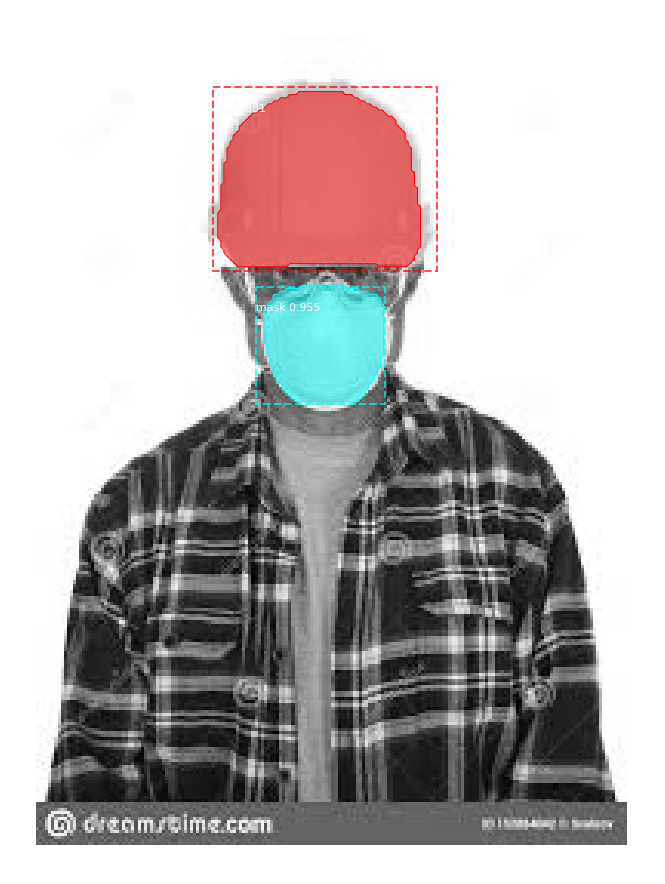

train32.jpg
Processing 1 images
image                    shape: (275, 183, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.99028045 0.9859649 ]


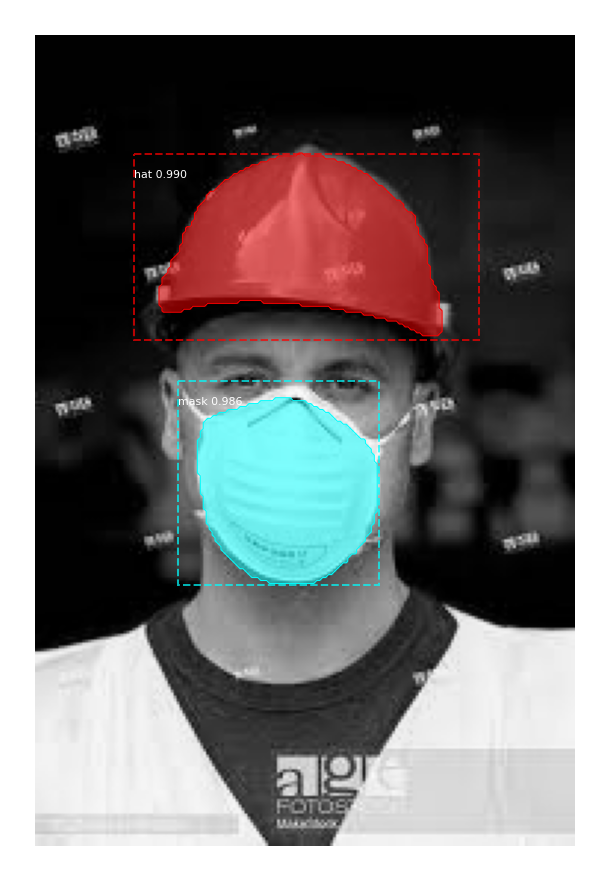

train4.jpg
Processing 1 images
image                    shape: (168, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  300.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.98379654]


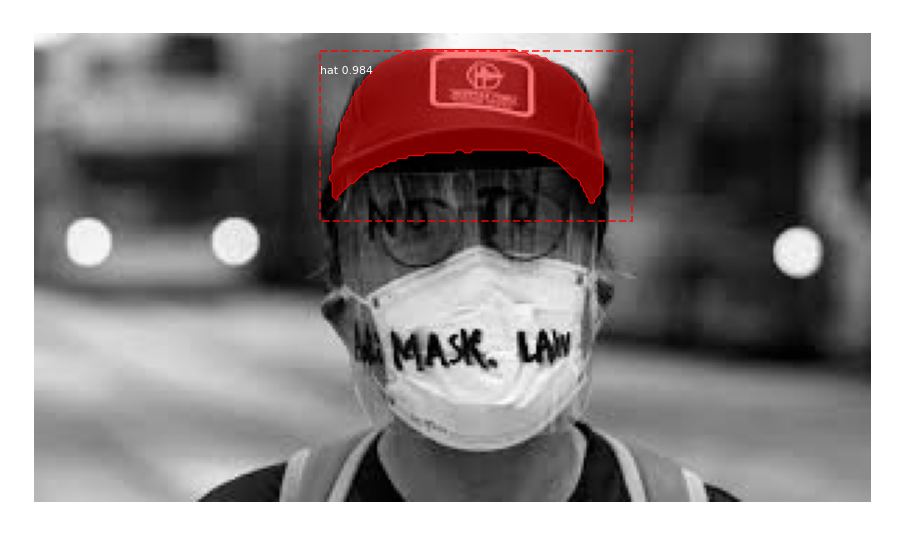

train47.jpg
Processing 1 images
image                    shape: (157, 321, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  321.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9951708]


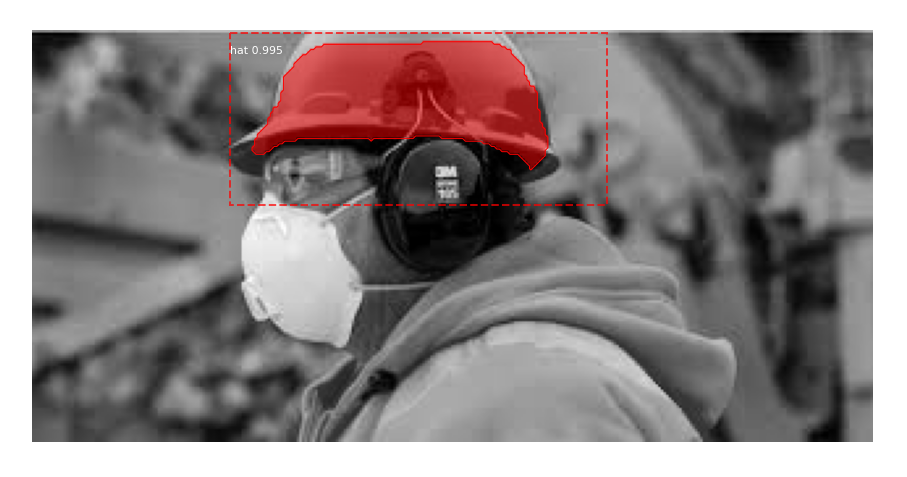

train55.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9928368]


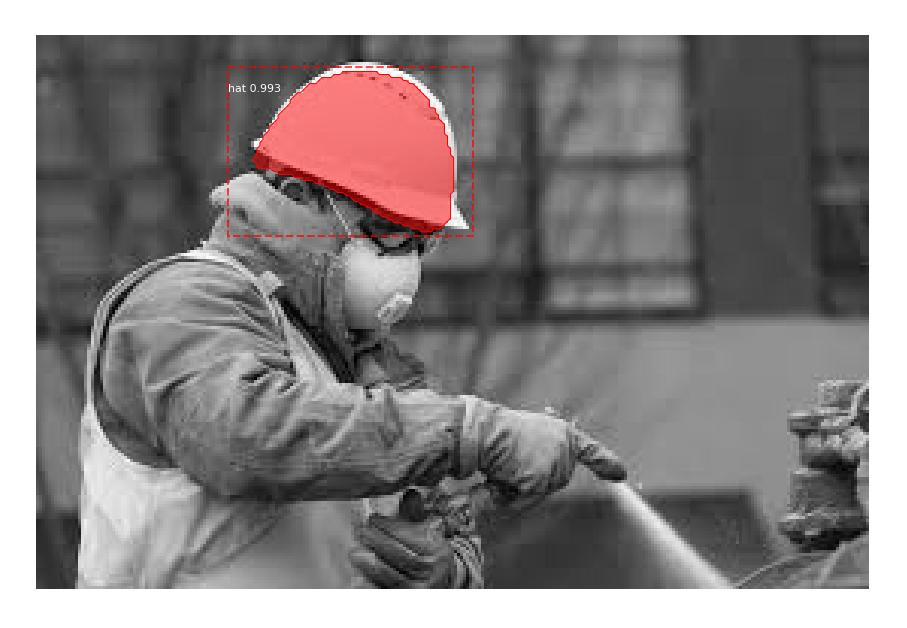

train59.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.9951603  0.98900247]


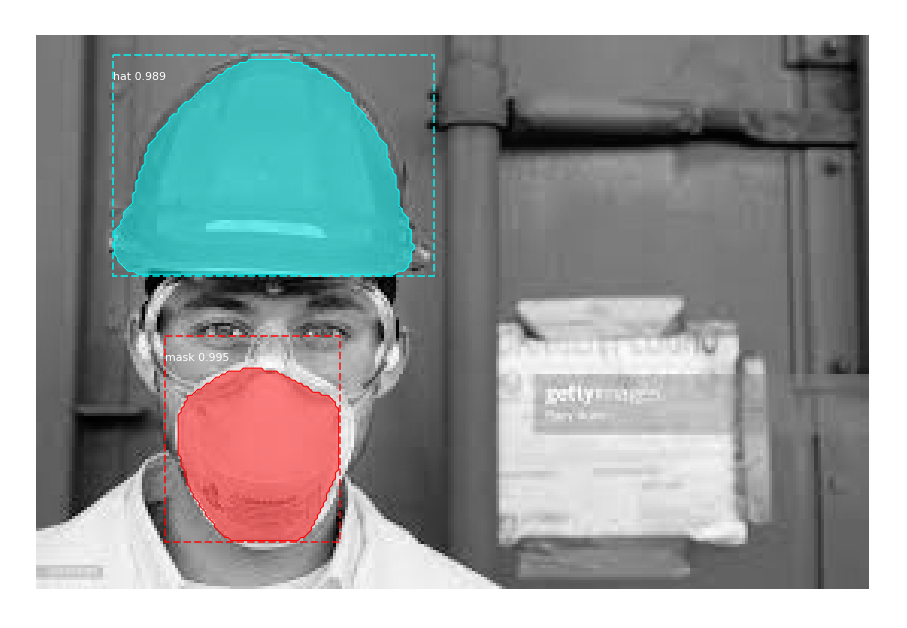

train61.jpg
Processing 1 images
image                    shape: (214, 236, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  236.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9751629]


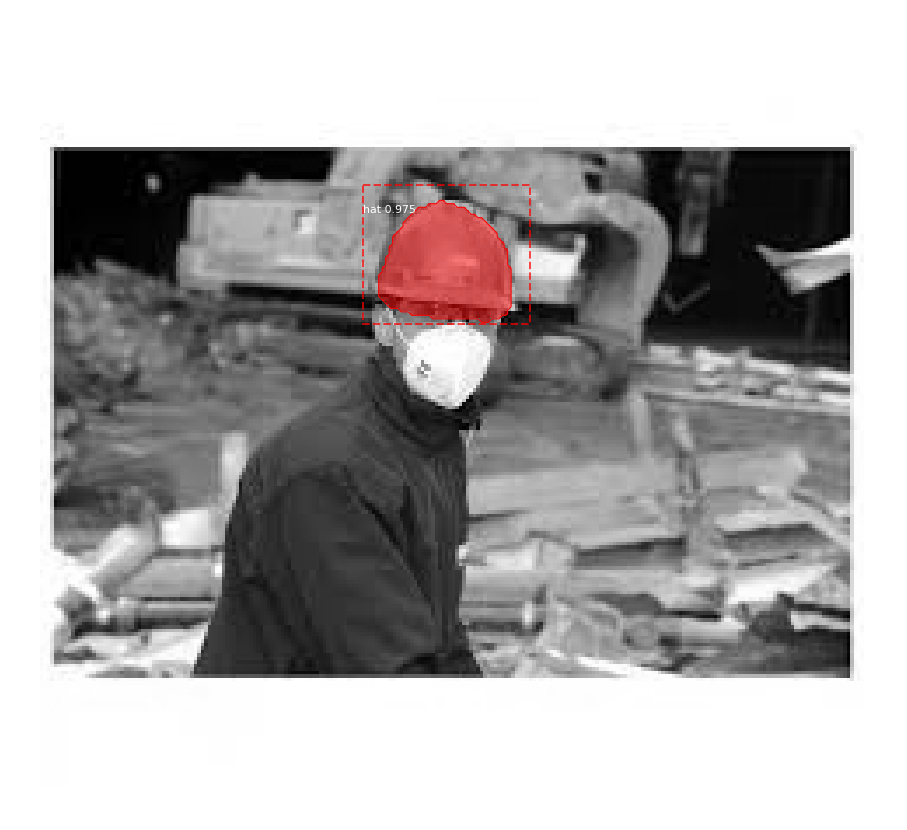

train62.jpg
Processing 1 images
image                    shape: (1392, 986, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1392.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9930791]


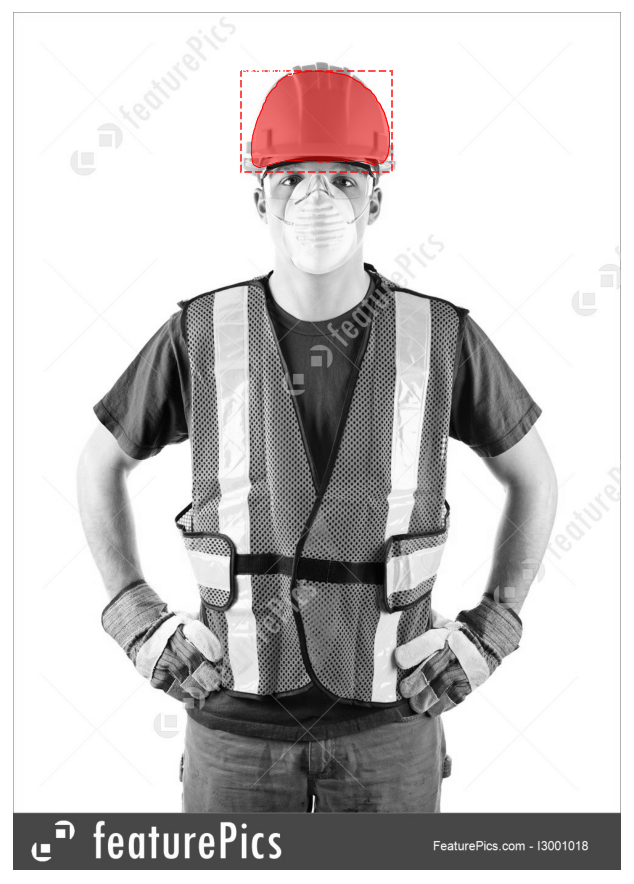

train8.jpg
Processing 1 images
image                    shape: (225, 225, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -122.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  225.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9681038]


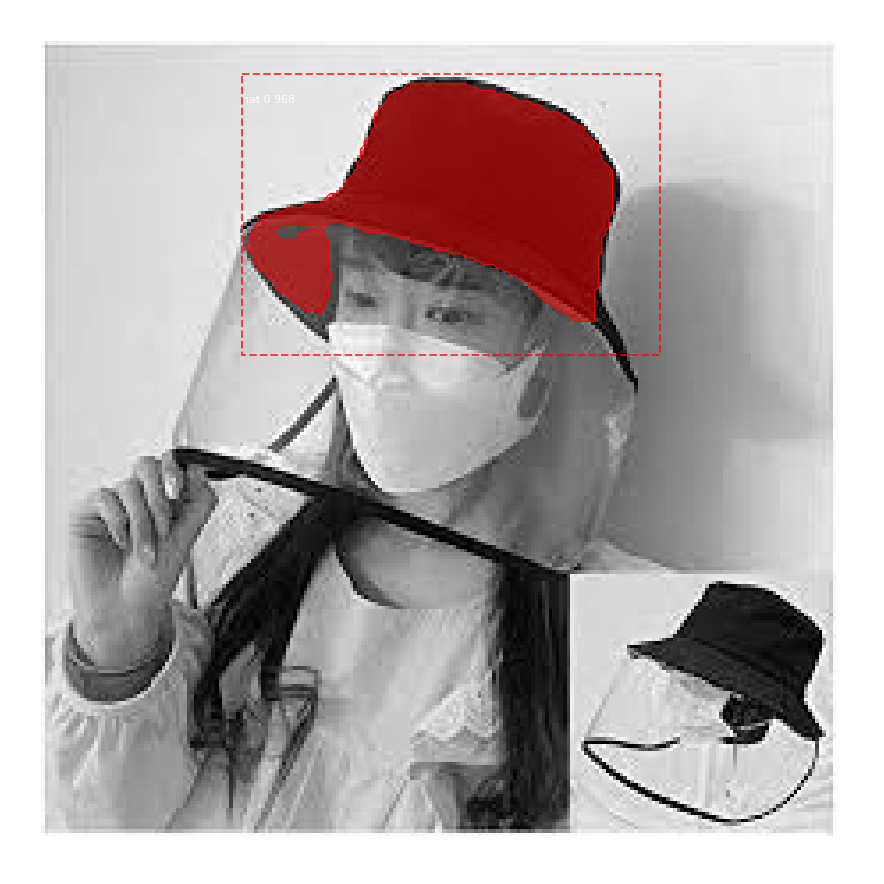

In [6]:
file_names = next(os.walk(IMAGE_DIR))[2]
for file_name in file_names:
    print(file_name)
    image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    print(r['class_ids'])
    print(r['scores'])
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    visualize.display_instances(gray, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


## Training with pre-trained weights


In [7]:
FMASK_MODEL_PATH_2 = os.path.join(ROOT_DIR, "mask_rcnn_fmask_2.h5")
config = fmask.FMaskConfig()
config.BACKBONE = "resnet50"

config.display()
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)
weights_path = FMASK_MODEL_PATH
model.load_weights(weights_path, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

faug = iaa.Sequential([iaa.Fliplr(1),iaa.CLAHE()])
#faug = iaa.OneOf([iaa.ContrastNormalization((0.5, 1.5)), iaa.GaussianBlur(sigma=(0.0, 5.0))])
#faug = None
fmask.fit(30,model, train_dataset, config, "mask_rcnn_fmask_2.h5", FMASK_MODEL_PATH_2, faug)


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

50/50 [==============================] - 17s 345ms/step - loss: 1.1051 - rpn_class_loss: 0.0579 - rpn_bbox_loss: 0.3416 - mrcnn_class_loss: 0.1569 - mrcnn_bbox_loss: 0.2509 - mrcnn_mask_loss: 0.2978 - val_loss: 1.0875 - val_rpn_class_loss: 0.0850 - val_rpn_bbox_loss: 0.3161 - val_mrcnn_class_loss: 0.2743 - val_mrcnn_bbox_loss: 0.1657 - val_mrcnn_mask_loss: 0.2464
Epoch 6/30
50/50 [==============================] - 17s 347ms/step - loss: 0.9064 - rpn_class_loss: 0.0582 - rpn_bbox_loss: 0.2969 - mrcnn_class_loss: 0.1309 - mrcnn_bbox_loss: 0.1867 - mrcnn_mask_loss: 0.2337 - val_loss: 1.4271 - val_rpn_class_loss: 0.0909 - val_rpn_bbox_loss: 0.5671 - val_mrcnn_class_loss: 0.2171 - val_mrcnn_bbox_loss: 0.2827 - val_mrcnn_mask_loss: 0.2694
Epoch 7/30
50/50 [==============================] - 17s 350ms/step - loss: 0.8760 - rpn_class_loss: 0.0510 - rpn_bbox_loss: 0.2827 - mrcnn_class_loss: 0.1022 - mrcnn_bbox_loss: 0.2145 - mrcnn_mask_loss: 0.2257 - val_loss: 1.5085 - val_rpn_class_loss: 0.0886

Epoch 27/30
50/50 [==============================] - 17s 336ms/step - loss: 0.5395 - rpn_class_loss: 0.0378 - rpn_bbox_loss: 0.1803 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.1113 - mrcnn_mask_loss: 0.1587 - val_loss: 1.2456 - val_rpn_class_loss: 0.0805 - val_rpn_bbox_loss: 0.3839 - val_mrcnn_class_loss: 0.2063 - val_mrcnn_bbox_loss: 0.2107 - val_mrcnn_mask_loss: 0.3642
Epoch 28/30
50/50 [==============================] - 17s 346ms/step - loss: 0.6124 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.1927 - mrcnn_class_loss: 0.0700 - mrcnn_bbox_loss: 0.1348 - mrcnn_mask_loss: 0.1822 - val_loss: 1.2071 - val_rpn_class_loss: 0.1313 - val_rpn_bbox_loss: 0.5375 - val_mrcnn_class_loss: 0.1690 - val_mrcnn_bbox_loss: 0.1589 - val_mrcnn_mask_loss: 0.2104
Epoch 29/30
50/50 [==============================] - 16s 319ms/step - loss: 0.5858 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.1623 - mrcnn_class_loss: 0.0699 - mrcnn_bbox_loss: 0.1401 - mrcnn_mask_loss: 0.1831 - val_loss: 1.0148 - val_rpn_clas

## Create Model using the newly trained weights

In [8]:
config.GPU_COUNT = 1
config.IMAGES_PER_GPU = 1
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load newly trained weights
model.load_weights(FMASK_MODEL_PATH_2, by_name=True)
# fmask Class names
dataset = fmask.FMaskDataset()
dataset.load_fmask(FMASK_DIR, "train")
dataset.prepare()
class_names = dataset.class_names

   ## Run Object detection again

train29.jpg
Processing 1 images
image                    shape: (263, 192, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  263.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.9906378  0.96532494]


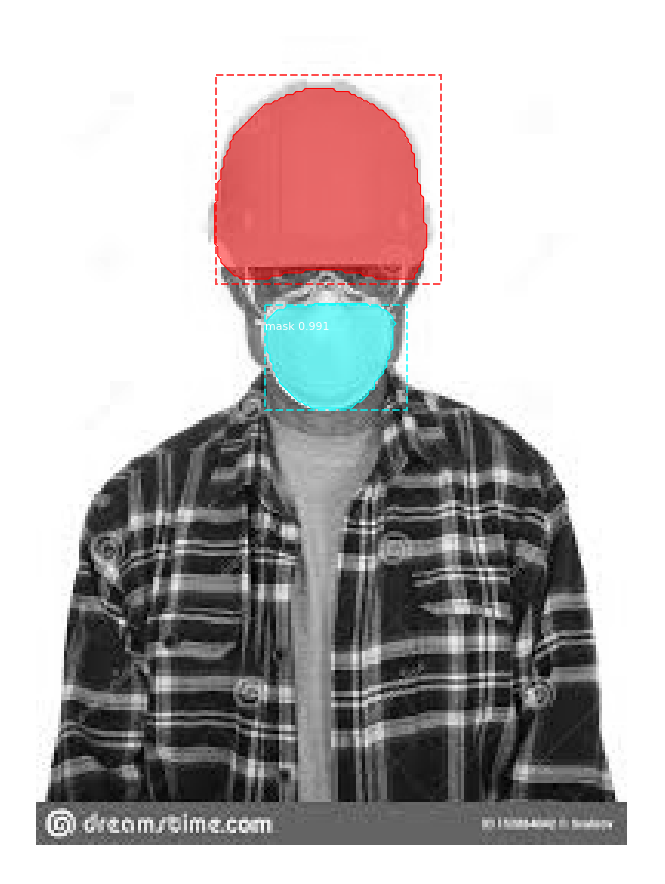

train32.jpg
Processing 1 images
image                    shape: (275, 183, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2]
[0.99627423 0.95440423]


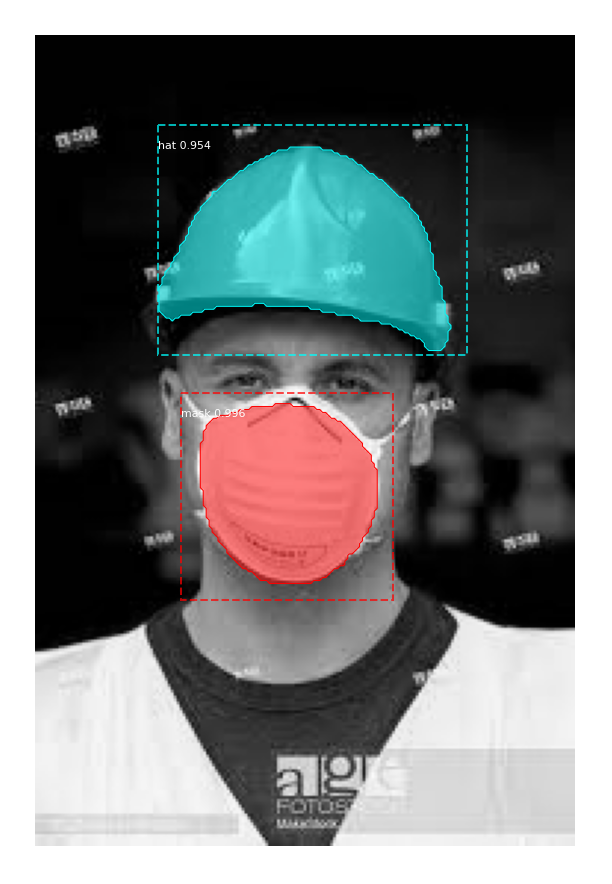

train4.jpg
Processing 1 images
image                    shape: (168, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  300.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1 2 1]
[0.9737005  0.9532677  0.90665454]


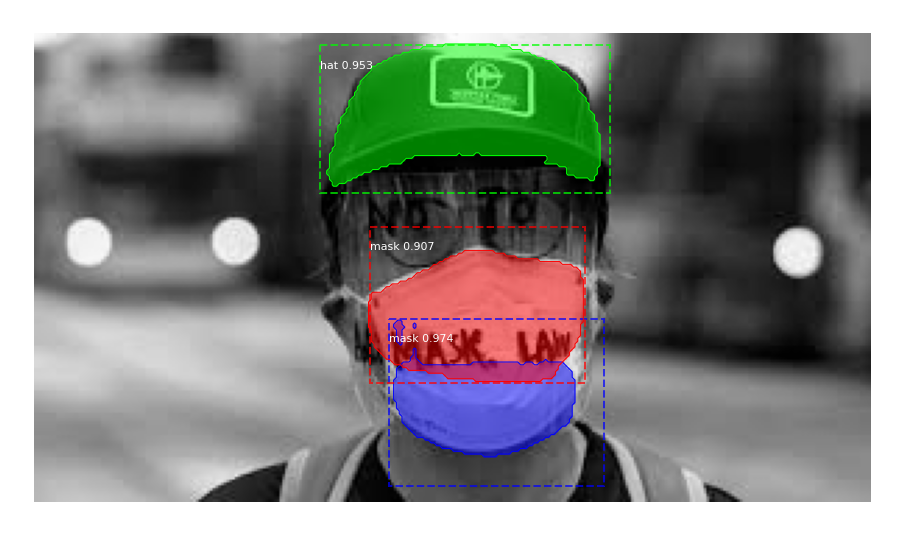

train47.jpg
Processing 1 images
image                    shape: (157, 321, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  321.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.98874015 0.9672965 ]


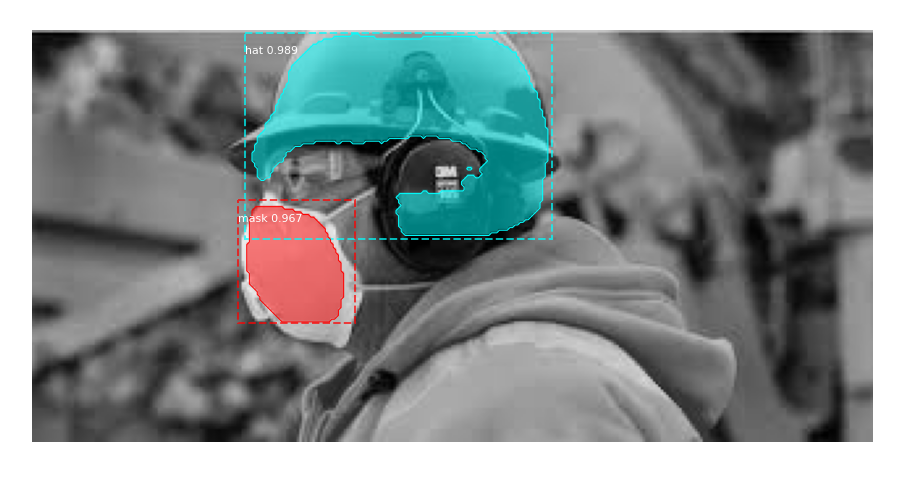

train55.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.94591874 0.9356114 ]


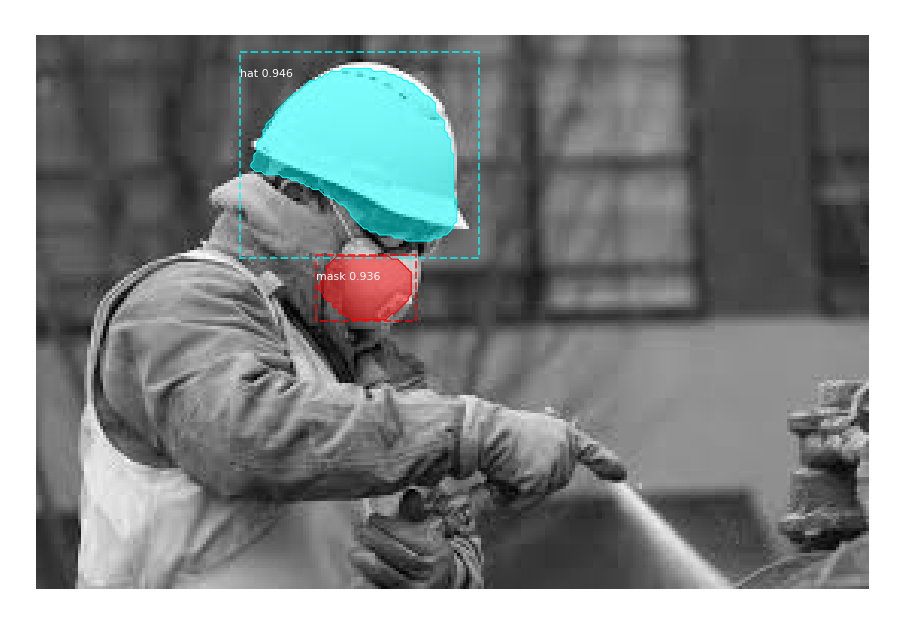

train59.jpg
Processing 1 images
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  275.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2 1]
[0.99482226 0.96087325]


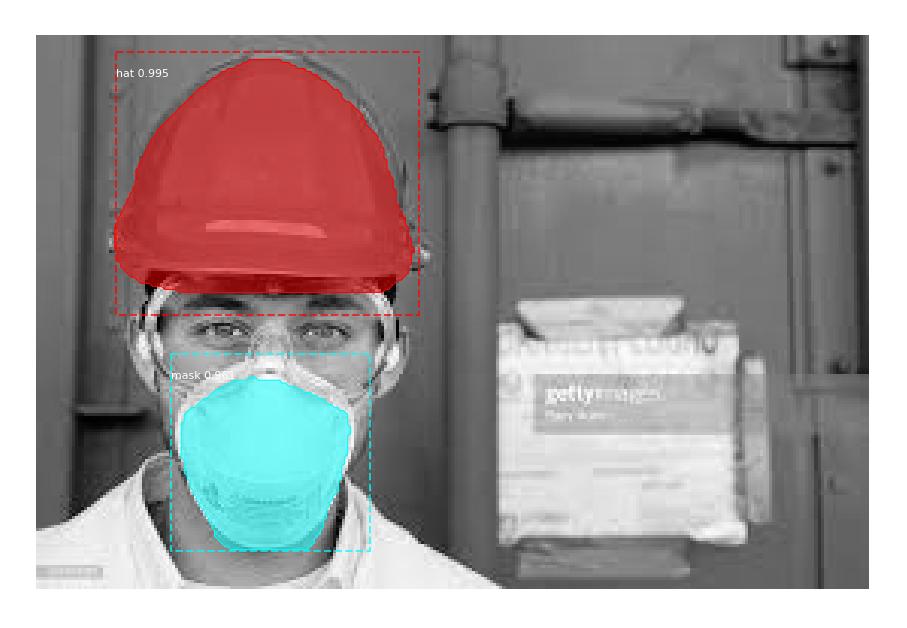

train61.jpg
Processing 1 images
image                    shape: (214, 236, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  236.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1]
[0.95712674]


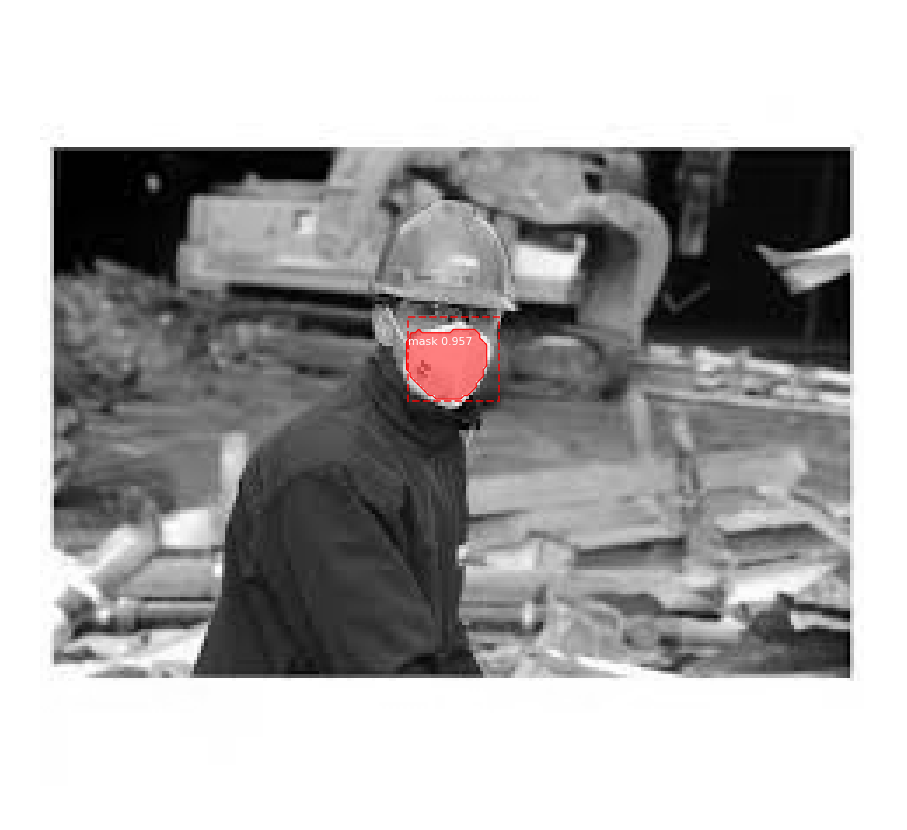

train62.jpg
Processing 1 images
image                    shape: (1392, 986, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1392.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[2]
[0.9443944]


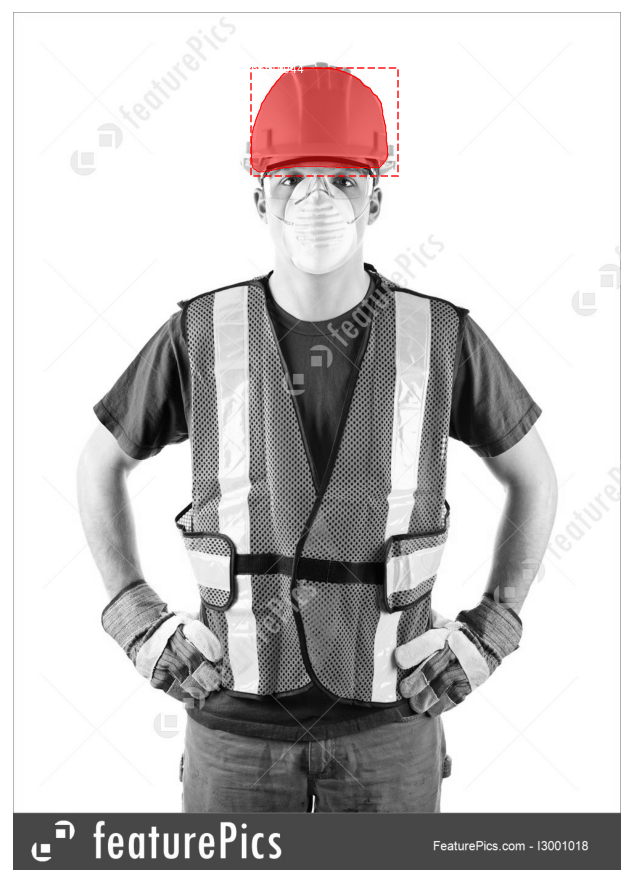

train8.jpg
Processing 1 images
image                    shape: (225, 225, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -122.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  225.00000  float64
anchors                  shape: (1, 4092, 4)          min:   -2.85070  max:    3.34676  float32
[1]
[0.9882089]


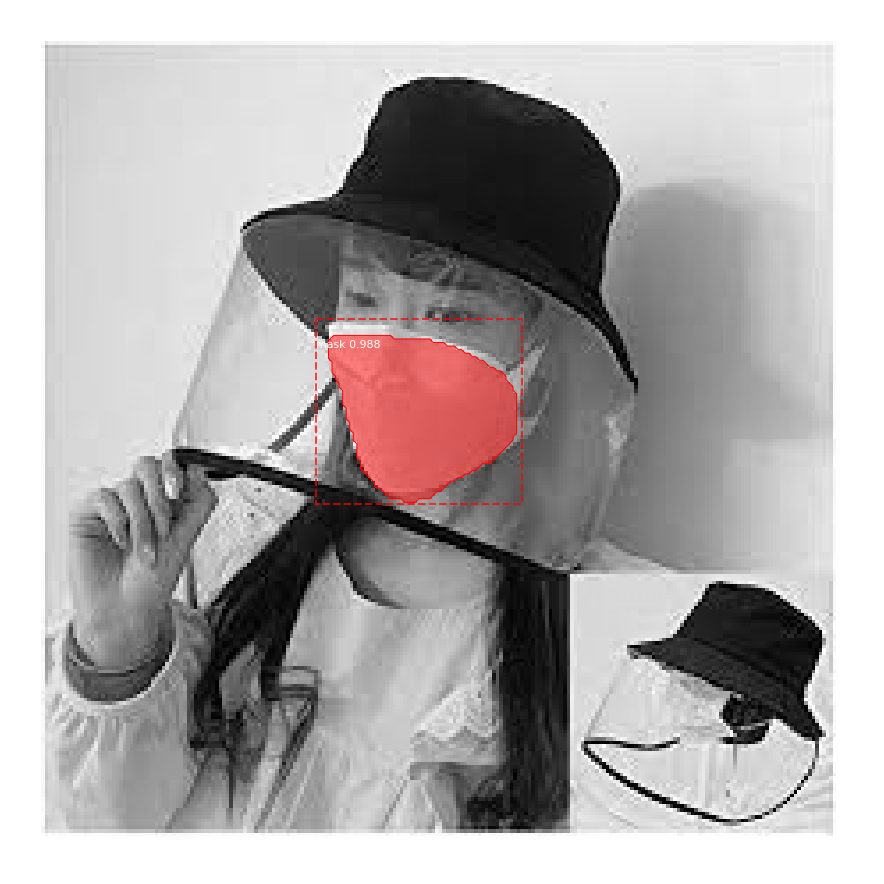

In [9]:
file_names = next(os.walk(IMAGE_DIR))[2]
for file_name in file_names:
    print(file_name)
    image = skimage.io.imread(os.path.join(IMAGE_DIR, file_name))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    print(r['class_ids'])
    print(r['scores'])
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    visualize.display_instances(gray, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])